In [58]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv
#import scipy.io.wavfile
import scipy.ndimage as sp
#import calendar

## Histograms, Means, and Standard Deviations

In [39]:
h = [63, 66, 71, 65, 70, 66, 67, 65, 67, 74, 64, 75, 68, 67, 70, 73, 66, 70, 72, 62, 68, 
     70, 62, 69, 66, 70, 70, 68, 69, 70, 71, 65, 64, 71, 64, 78, 69, 70, 65, 66, 72, 64]

d = {}
for i in h:
    d[i] = d.get(i, 0)+1

histlist = []
for i in d:
    histlist.append((i, d.get(i)))
    
sorted(histlist)
hist0 = [i for (i,j) in histlist]
hist1 = [j for (i,j) in histlist]

[64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 78, 62, 63]
[4, 4, 5, 3, 3, 3, 8, 3, 2, 1, 1, 1, 1, 2, 1]


In [21]:
#not used yet, just pulled from previous code now in case it's relevant
def figshow(f):
    fig = plt.figure(figsize=(4,4))
    plt.grid(False)
    plt.imshow(f);

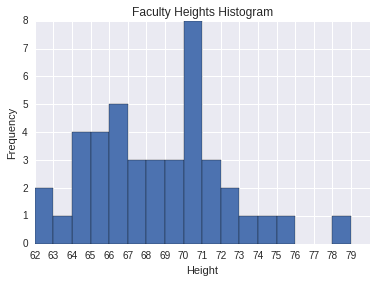

In [41]:
plt.bar(hist0, hist1, width=1)
plt.title("Faculty Heights Histogram")
plt.xlabel("Height")
plt.xticks(np.arange(78-62+2)+62)
plt.ylabel("Frequency")

fig = plt.gcf()

In [56]:
heights_mean = sum(h)/len(h)
heights_stdDev = sqrt(sum([(heights_mean-i)**2 for i in h])//len(h))

heights_mean_auto = np.mean(h)
heights_stdDev_auto = np.std(h)

print [heights_mean, heights_mean_auto] #these are equal
print [heights_stdDev, heights_stdDev_auto] #these are equal


[477/7, 68.142857142857139]
[1/7*sqrt(1831/3), 3.5292750407024345]


# Correlation

In [ ]:
#not used any more - panda data frames are easier
stringData = []
with open('./stateData.csv','rb') as csvfile:
    stateData = csv.reader(csvfile, delimiter=' ', quotechar='|')
    for line in stateData:
        stringData.append(line)
data = []
for j in range(len(stringData)-1):
    data.append([i for i in stringData[j][0].split(',')])

In [110]:
pd.read_csv('./stateData.csv')

,State Name,Poverty,Infant Mort,White,Crime,Doctors,Traf Deaths,University,Unemployed,Income
0,Alabama,15.7,9.0,71.0,448,218.2,1.81,22.0,5.0,42666
1,Alaska,8.4,6.9,70.6,661,228.5,1.63,27.3,6.7,68460
2,Arizona,14.7,6.4,86.5,483,209.7,1.69,25.1,5.5,50958
3,Arkansas,17.3,8.5,80.8,529,203.4,1.96,18.8,5.1,38815
4,California,13.3,5.0,76.6,523,268.7,1.21,29.6,7.2,61021
5,Colorado,11.4,5.7,89.7,348,259.7,1.14,35.6,4.9,56993
6,Connecticut,9.3,6.2,84.3,256,376.4,0.86,35.6,5.7,68595
7,Delaware,10.0,8.3,74.3,689,250.9,1.23,27.5,4.8,57989
8,Florida,13.2,7.3,79.8,723,247.9,1.56,25.8,6.2,47778
9,Georgia,14.7,8.1,65.4,493,217.4,1.46,27.5,6.2,50861


In [111]:
#This was easier than calculating it by hand, and more useful to me.

def findCorrelation(df, test1, test2):
    mean1 = df[test1].mean()
    mean2 = df[test2].mean()
    r=0
    elements = len(df[test1])
    for i in range(elements):
        r+=((df[test1][i])-mean1)*((df[test2][i])-mean2)
    rxy = r/elements/df[test1].std()/df[test2].std()
    return rxy

data = pd.read_csv('./stateData.csv')
findCorrelation(data,'University','Income')

0.69420837297396532

In [126]:
#Create three column vector of (data-mean)/stdDev for 3 given categories in dataframe

row_vectors = []
for i in ['University','Income','Infant Mort']:
    l = data[i]
    l_vector = (l-l.mean())/l.std()
    row_vectors.append(l_vector)

col_vectors = np.transpose(row_vectors)
print col_vectors
row_vectors = np.transpose(col_vectors)
print row_vectors

[[-1.08551776 -1.21397563  1.57928167]
 [-0.00509633  1.34335929 -0.06525957]
 [-0.45357315 -0.39186889 -0.45681701]
 [-1.73784768 -1.59578135  1.18772423]
 [ 0.4637658   0.60582287 -1.55317784]
 [ 1.68688441  0.20646856 -1.00499742]
 [ 1.68688441  1.3567438  -0.61343999]
 [ 0.03567429  0.30521654  1.03110125]
 [-0.31087598 -0.70714861  0.24798638]
 [ 0.03567429 -0.40148592  0.87447828]
 [ 0.36183925  1.21982516 -1.08330891]
 [-0.67781156 -0.72717581 -0.14357106]]
[[-1.08551776 -0.00509633 -0.45357315 -1.73784768  0.4637658   1.68688441
   1.68688441  0.03567429 -0.31087598  0.03567429  0.36183925 -0.67781156]
 [-1.21397563  1.34335929 -0.39186889 -1.59578135  0.60582287  0.20646856
   1.3567438   0.30521654 -0.70714861 -0.40148592  1.21982516 -0.72717581]
 [ 1.57928167 -0.06525957 -0.45681701  1.18772423 -1.55317784 -1.00499742
  -0.61343999  1.03110125  0.24798638  0.87447828 -1.08330891 -0.14357106]]


## Linear Regression

In [139]:
t = [53,54,58,66,69,70,71,73,81]
c = [19,26,21,33,31,36,36,38,45]

xi = sum(t)
yi = sum(c)
xsqr = sum([i**2 for i in t])
xiyi = sum([t[i]*c[i] for i in range(len(t))])
n  = len(t)

print xi
print yi
print xsqr
print xiyi
print n

595
285
40037
19441
9


In [141]:
a = [[xsqr, xi],[xi,n]]
a_inv = np.linalg.inv(a)
v = [[xiyi],[yi]]

[[a],[b]] = np.dot(a_inv,v) #find a and b

#find two points on line of best fit for plotting
y1 = a*t[0]+b
y2 = a*t[n-1]+b

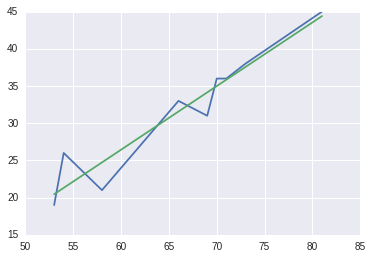

In [142]:
plt.plot(t,c)
plt.plot([t[0], t[n-1]],[y1, y2]) #line of best fit 
plt.show()